# KAGGLE: Natural Language Processing with Diaster Tweets
AUTHOR: SungwookLE  
DATE: '21.7/9  
DATA: https://www.kaggle.com/c/nlp-getting-started/overview  
REFERENCE: https://www.kaggle.com/mariapushkareva/nlp-disaster-tweets-with-glove-and-lstm

### Competition Description
<img src="https://storage.googleapis.com/kaggle-media/competitions/nlp1-cover.jpg" width=1000, height=150>  

 It’s not always clear whether a person’s words are actually announcing a disaster. [This tweet](https://storage.googleapis.com/kaggle-media/competitions/tweet_screenshot.png) explicitly uses the word “ABLAZE” but means it metaphorically. This is clear to a human right away, especially with the visual aid. But it’s less clear to a machine.  
 In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified. If this is your first time working on an NLP problem, we've created a [quick tutorial](https://www.kaggle.com/philculliton/nlp-getting-started-tutorial) to get you up and running. Disclaimer: The dataset for this competition contains text that may be considered profane, vulgar, or offensive.  
 Another [reference](https://www.kaggle.com/andreshg/nlp-glove-bert-tf-idf-lstm-explained#7.-LSTM) is here.  

### DATA
#### 1) What am I predicting
- Predict whether a given tweet is about a real diaster or not. If so, predict a `1`, If not, predict a `0`.  

#### 2) Columns
- id - a unique identifier for each tweet
- text - the text of the tweet
- location - the location the tweet was sent from (may be blank)
- keyword - a particular keyword from the tweet (may be blank)
- target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

## START
- Natural Language Processing 역시, 단어들을 전부다 Vectorize 해서, 각각에 class 를 붙인 다음에, twork에 feed시켜 학습시키는 것임
- 이 때, 단어는 앞 뒤 순서도 중요하기 떄문에, timesequence를 고려할 수 있는 LSTM같은 네트워크를 써본 것이고,
- 간단한 LinearClassifier 모델을 써도 성능은 65%정도 나오는듯 함



In [1]:
import numpy as np
import pandas as pd
from subprocess import check_output

In [2]:
print(check_output(['ls','input']).decode('utf8'))

glove.6B.100d.txt
glove.6B.100d.txt.zip
nlp-getting-started.zip
sample_submission.csv
test.csv
train.csv



In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

## 1. EDA(Exploratory Data Analysis, 탐색적 데이터 분석)

In [4]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

train_len = len(train)
test_len = len(test)

train_id = train['id']
test_id = test['id']

train.drop('id',axis=1, inplace=True)
test.drop('id',axis=1, inplace=True)

train_label = train['target']

train.drop( 'target', axis=1, inplace=True)
all_data = pd.concat([train, test])

print(train.shape, test.shape)
print(all_data.shape)
all_data.tail()

(7613, 3) (3263, 3)
(10876, 3)


,keyword,location,text
3258,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,NaN,NaN,#CityofCalgary has activated its Municipal Eme...


Text(0, 0.5, 'tweets')

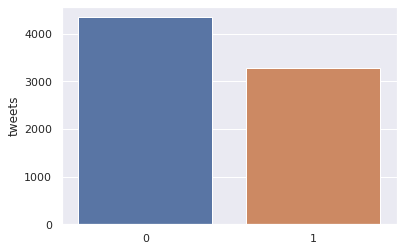

In [5]:
# Checking the class distribution
x = train_label.value_counts()
sns.barplot(x.index, x.values)
plt.gca().set_ylabel('tweets')

Text(0.5, 0.98, 'Characters in tweets')

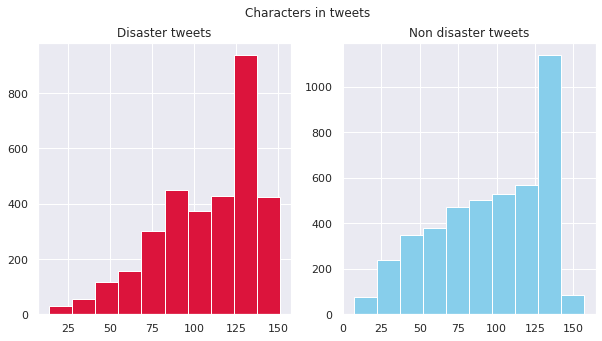

In [6]:
# Number of characters in tweets
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
train_text_len = train.loc[train_label==1]['text'].str.len()
ax1.hist(train_text_len, color='crimson')
ax1.set_title('Disaster tweets')

train_text_len = train.loc[train_label==0]['text'].str.len()
ax2.hist(train_text_len, color='skyblue')
ax2.set_title('Non disaster tweets')
fig.suptitle('Characters in tweets')

Text(0.5, 0.98, 'Words in a tweet')

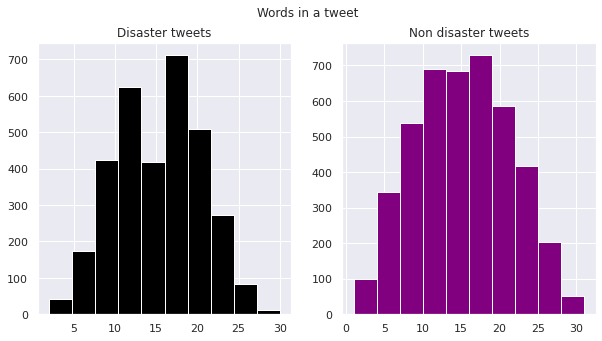

In [7]:
# Number of words in a tweets
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
train_word_len = train.loc[train_label==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(train_word_len, color = 'black')
ax1.set_title('Disaster tweets')

train_word_len = train.loc[train_label==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(train_word_len, color = 'purple')
ax2.set_title('Non disaster tweets')
fig.suptitle('Words in a tweet')

Text(0.5, 0.98, 'Average word length in each tweet')

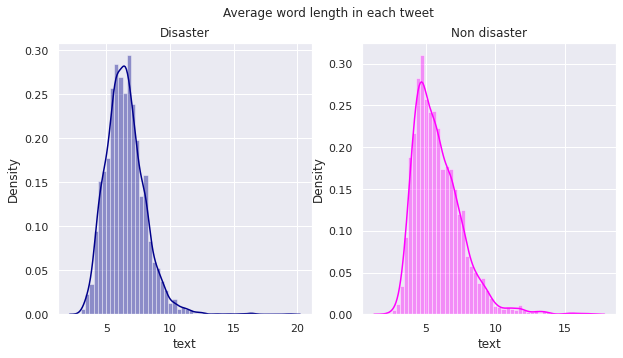

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
word = train.loc[train_label==1]['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x : np.mean(x))
sns.distplot(word, ax=ax1, color='darkblue')
ax1.set_title('Disaster')

word = train.loc[train_label==0]['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
sns.distplot(word, ax=ax2, color='magenta')
ax2.set_title('Non disaster')
fig.suptitle('Average word length in each tweet')

In [9]:
def create_corpus(target):
    corpus=[]
    for x in tweet.loc[tweet['target'] == target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [10]:
def create_corpus_df(tweet, target):
    corpus =[]
    for x in tweet.loc[tweet['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

## 2. Feature Engineering
- 결측 데이터 채우고, 정리하기
- new/del feature

USA          494
UK           124
Africa        72
Worldwide     28
India         28
Canada        16
Name: location, dtype: int64


<AxesSubplot:xlabel='location'>

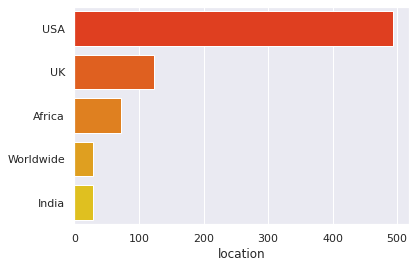

In [12]:
# Renaming locations means

all_data['location']=all_data['location'].map({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "Mumbai":"India"})

print(all_data['location'].value_counts())

sns.barplot(y = all_data['location'].value_counts()[:5].index, x = all_data['location'].value_counts()[:5],
            palette='autumn')

In [13]:
import re
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Applying the cleaning fuction to both test and traing datasets
all_data['text']= all_data['text'].apply(lambda x: clean_text(x))
# Let's take a look at the updated text
all_data['text'].head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [14]:
#Removing Emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
    
all_data['text']=all_data['text'].apply(lambda x: remove_emoji(x))

In [15]:
all_data.values.shape

(10876, 3)

## 3. Model
We are going to use LSTM (long short-term memory) model because it solves a vanishing gradient problem

In [16]:
train_feed = all_data['text'][:train_len].values
test_feed = all_data['text'][train_len:].values
sentiments = train_label.values

We need to perform **tokenization** - the processing of segmenting text into sentences of words. In the process we throw away punctuation and extra symbols too. The benefit of tokenization is that it gets the text into a format that is easier to convert to raw numbers, which can actually be used for processing.

In [17]:
from keras.preprocessing.text import Tokenizer
word_tokenizer = Tokenizer()

Using Theano backend.


In [18]:
word_tokenizer.fit_on_texts(train_feed)
vocab_length = len(word_tokenizer.word_index) + 1

In [19]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    accuracy_score
)

def metrics(pred_tag, y_test):
    print("F1-score: ", f1_score(pred_tag, y_test))
    print("Precision: ", precision_score(pred_tag, y_test))
    print("Recall: ", recall_score(pred_tag, y_test))
    print("Accuracy: ", accuracy_score(pred_tag, y_test))
    print("-"*50)
    print(classification_report(pred_tag, y_test))

def embed(corpus):
    return word_tokenizer.texts_to_sequences(corpus)

In [20]:
def plot(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

In [21]:
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

longest_train = max(train_feed, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(embed(train_feed), length_long_sentence, padding='post')
test_padded_sentences = pad_sequences(embed(test_feed), length_long_sentence, padding='post')

[nltk_data] Downloading package punkt to /home/joker1251/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


To obtain a vector representation for words we can use an unsuperviesed learning algorithm called **GloVe (Global Vectors for Word Representation), which focuses on words co-occurrences over the whole corpus. Its embeddings relate to the probabilities that two words appear together

In [22]:
embeddings_dictionary = dict()
embeddings_dim = 100
glove_file = open('input/glove.6B.100d.txt')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [23]:
embedding_matrix = np.zeros((vocab_length, embeddings_dim))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences,
    sentiments,
    test_size=0.25)

In [25]:
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.layers import (LSTM,
                          Embedding,
                          BatchNormalization,
                          Dense,
                          TimeDistributed,
                          Dropout,
                          Bidirectional,
                          Flatten,
                          GlobalMaxPool1D)

def BLSTM():
    model = Sequential()
    model.add(Embedding(input_dim = embedding_matrix.shape[0],
                        output_dim= embedding_matrix.shape[1],
                        weights = [embedding_matrix],
                        input_length = length_long_sentence))
    model.add(Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.2)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation ='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation = 'sigmoid'))
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics= ['accuracy'])
    return model    

In [26]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

model = BLSTM()
checkpoint = ModelCheckpoint(
    'model.h5',
    monitor = 'val_loss',
    verbose = 1,
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor=0.2,
    verbose =1,
    patience= 5,
    min_lr = 0.001
)
history = model.fit(
    X_train,
    y_train,
    epochs = 7,
    batch_size = 32,
    validation_data = [X_test, y_test],
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Train on 5709 samples, validate on 1904 samples
Epoch 1/7
5709/5709 [==============================] - 7s 1ms/step - loss: 0.8256 - acc: 0.5850 - val_loss: 0.6212 - val_acc: 0.7983

Epoch 00001: val_loss improved from inf to 0.62122, saving model to model.h5
Epoch 2/7
5709/5709 [==============================] - 8s 1ms/step - loss: 0.5777 - acc: 0.7127 - val_loss: 0.5011 - val_acc: 0.8130

Epoch 00002: val_loss improved from 0.62122 to 0.50109, saving model to model.h5
Epoch 3/7
5709/5709 [==============================] - 7s 1ms/step - loss: 0.5138 - acc: 0.7620 - val_loss: 0.4399 - val_acc: 0.8062

Epoch 00003: val_loss improved from 0.50109 to 0.43985, saving model to model.h5
Epoch 4/7
5709/5709 [==============================] - 8s 1ms/step - loss: 0.4666 - acc: 0.7966 - val_loss: 0.4401 - val_acc: 0.8220

Epoch 00004: val_loss did not improve
Epoch 5/7
5709/5709 [==============================] - 7s 1ms/step - loss: 0.4378 - acc: 0.8192 - val_loss: 0.4365 - val_acc: 0.8083

Epoch

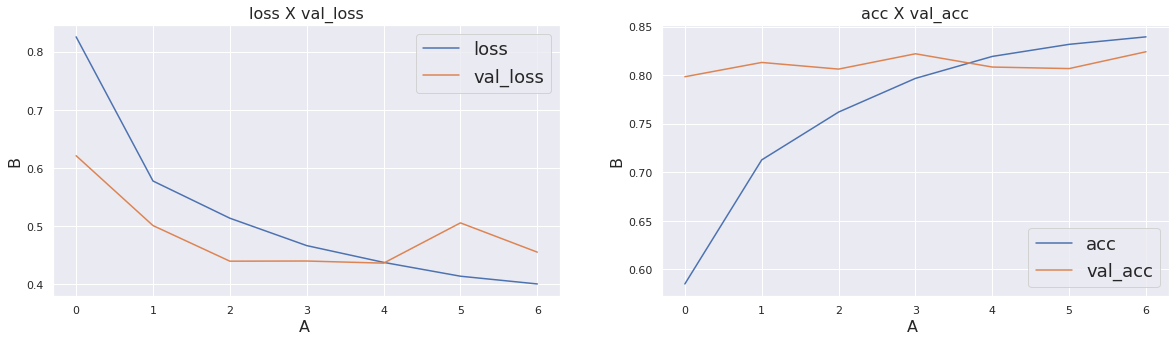

In [27]:
plot(history, [['loss', 'val_loss'],['acc', 'val_acc']])

In [28]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy: ', accuracy)

1904/1904 [==============================] - 1s 297us/step
Loss: 0.4553891943783319
Accuracy:  0.8240546218487395


In [29]:
preds = model.predict_classes(X_test)
metrics(preds, y_test)

F1-score:  0.7744107744107744
Precision:  0.7315521628498728
Recall:  0.8226037195994278
Accuracy:  0.8240546218487395
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      1205
           1       0.73      0.82      0.77       699

    accuracy                           0.82      1904
   macro avg       0.81      0.82      0.82      1904
weighted avg       0.83      0.82      0.83      1904



In [30]:
#model.load_weights('model.h5')
preds = model.predict_classes(X_test)
metrics(preds, y_test)

F1-score:  0.7744107744107744
Precision:  0.7315521628498728
Recall:  0.8226037195994278
Accuracy:  0.8240546218487395
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      1205
           1       0.73      0.82      0.77       699

    accuracy                           0.82      1904
   macro avg       0.81      0.82      0.82      1904
weighted avg       0.83      0.82      0.83      1904



In [31]:
submission = pd.DataFrame(columns=['id','target'])

<AxesSubplot:>

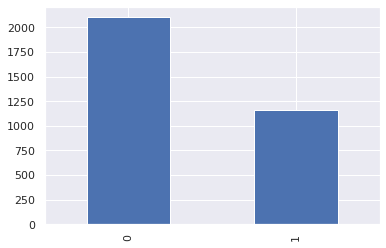

In [32]:
submission['target']=model.predict_classes(test_padded_sentences).squeeze()
submission['id']= test_id
submission.to_csv('output/submission.csv', index=False)
submission['target'].value_counts().plot.bar()

In [33]:
submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


## 4. (번외) Linear Model로 학습

In [34]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [35]:
count_vectorizer = feature_extraction.text.CountVectorizer()

train_lnr=all_data[:train_len]
test_lnr=all_data[train_len:]
count_vectorizer.fit(train_lnr["text"])

train_vectors = count_vectorizer.transform(train_lnr["text"])
test_vectors = count_vectorizer.transform(test_lnr["text"])


In [36]:
clf = linear_model.LogisticRegression(penalty='l2')
scores = model_selection.cross_val_score(clf, train_vectors, train_label, cv=3, scoring="f1")
print("SCORE using LinearModel is {:.3f}%".format(np.mean(scores)*100))


SCORE using LinearModel is 63.403%


In [37]:
clf.fit(train_vectors, train_label)
clf.predict(train_vectors)
sub = pd.DataFrame()
sub['id'] = test_id
sub['target'] = pd.Series(clf.predict(test_vectors))
print(sub.shape)
sub.head()

(3263, 2)


,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


### CounterVectorizer 란,

In [38]:
count_vectorizer = feature_extraction.text.CountVectorizer()
a=[['WHAT IS'], ['COUNT VECTORIZER'], ['SungwookLE TEST']]
a = pd.DataFrame(a, columns=['text'])
print(a)
print()
example_vectors = count_vectorizer.fit_transform(a["text"])
# we use .todense() here bacause these vectors are "sparse" (only non-zero elements are kept to save space)
print(example_vectors[0].todense().shape)
print(example_vectors[0].todense())

               text
0           WHAT IS
1  COUNT VECTORIZER
2   SungwookLE TEST

(1, 6)
[[0 1 0 0 0 1]]


## 끝